## Estimators

An **estimator** is a procedure applied to the data sample which gives a numerical value for a property of the parent population, or, as appropriate, a property or parameter of the parent distribution function. 

This is a general definition: The sample you have to study may have been drawn from a large *parent population*, for which you want to know some property. Alternatively, it may have been generated from a distribution function, arising from a basic law being investigated. This distribution function also has parameters and properties, and you may be trying to measure one of these. In many cases a parameter is also a property (e.g. $\mu$ and $\sigma$ for a gaussian).

As an example, let's consider the case of attempting to find the average height of all students in a university on the basis of an (honestly selected) sample of $N$. Some estimators you can use are shown below. All of these _are_ estimators, but some are clearly better than others. We typically classify estimators as "good" or "bad", rather than "right" or "wrong".

In [1]:
import numpy as np
%matplotlib inline

#This will be the parent distribution, containing the heights of all 40k students at the university
parentdist = np.random.normal(loc=168, scale=20, size=40000)

#Here's our sample of N heights.
N=100
sampledist = np.random.choice(parentdist, size=N, replace=False)

In [2]:
#Estimator 1: Add all the heights and divide by N
def e1(sampledist):
    return np.sum(sampledist)/len(sampledist)

print("result of estimator #1:", e1(sampledist))


('result of estimator #1:', 170.73815653737657)


In [3]:
#Estimator 2: Add up all the values and divide by N-10
def e2(sampledist):
    return np.sum(sampledist)/(len(sampledist)-10)

print("result of estimator #2:", e2(sampledist))

('result of estimator #2:', 189.7090628193073)


In [4]:
#Estimator 3: Throw away all the data and give the answer as 180cm
def e3(sampledist):
    return 180.

print("result of estimator #3:", e3(sampledist))

('result of estimator #3:', 180.0)


In [5]:
#Estimator 4: Add the tallest and shortest heights and divide by 2
def e4(sampledist):
    return (max(sampledist)+min(sampledist))/2.

print("result of estimator #4:", e4(sampledist))

('result of estimator #4:', 170.63584949558287)


### Picking a good estimator
A "good" estimator is *consistent*, *unbiased*, and *efficient*. 

- An estimator is *consistent* if it tends to the true value as the number of data values tends to infinity.

- An estimator is *unbiased* if its expectation value is equal to the true value.

- An estimator is *efficient* if its variance is small.

Let's take a look at some of our estimators from above and see how they do:

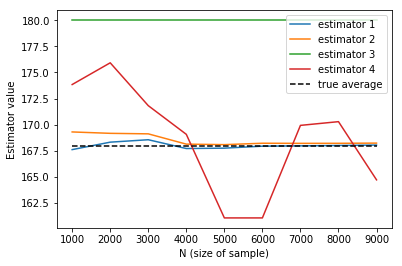

In [7]:
import matplotlib.pyplot as plt
#True average
trueavg = np.average(parentdist)

e1s = []
e2s = []
e3s = []
e4s = []
Ns = range(1000,10000,1000)
for N in Ns:
    bigsample = np.random.choice(parentdist, size=N, replace=False)
    e1s.append(e1(bigsample))
    e2s.append(e2(bigsample))
    e3s.append(e3(bigsample))
    e4s.append(e4(bigsample))

plt.plot(Ns, e1s, label='estimator 1')
plt.plot(Ns, e2s, label='estimator 2')
plt.plot(Ns, e3s, label='estimator 3')
plt.plot(Ns, e4s, label='estimator 4')
plt.plot(Ns, trueavg*np.ones(len(Ns)), 'k--', label='true average')
plt.xlabel('N (size of sample)')
plt.ylabel('Estimator value')
plt.legend(loc=0)
plt.show()

Notice a few things:

- Estimator 1 is consistent, unbiased, and efficient. This is a good estimator

- Estimator 2 is consistent and efficient, but *not* unbiased, since if we calculate the expectation value for this estimator, we get:

$\left \langle \mu \right \rangle = \frac{N}{N-10} \mu \neq \mu$

- Estimator 3 is efficient, but clearly not consistent or unbiased.

- Estimator 4 is consistent and unbiased, but is not very efficient. This makes sense, because it really only uses 2 values in our sample. 

## The Likelihood Function

One class of estimators that gets used a lot in physics is the *likelihood function*. For a set of data, {$x_1, x_2, x_3 ...x_N$} produced from some underlying distribution with parameter $a$, the probability of obtaining that particular data set is the product of the individual probabilities of obtaining each of the $x_i$. This product is called the *likelihood*:

$L(x_1, x_2, x_3..x_N, a) = P(x_1;a)P(x_2;a)...P(x_N;a)$
$L(x_1, x_2, x_3..x_N, a) = \prod_{i=1}^N P(x_i;a)$


We typically use this to attempt to fit the underlying distribution parameter $a$, given the data that we observe. 

To get some intuition for what's going on here, let's consider the following example: I have a random sample {$x_1, x_2, ...x_N$} where:

- $x_i$ = 0 if a person is NOT wearing glasses
- $x_i$ = 1 if a person is wearing glasses

I want to create an estimator for $a$: the proportion of people who wear glasses. For the purposes of this example, let's treat the $x_i$ as independent bernoulli random variables. In this case, the probability mass function for each $x_i$ is just given by:

$P(x_i;a) = a^{x_i}(1-a)^{1-x_i}$

where again, $x_i$=0 or 1 and $0 < a < 1$. 

In [35]:
#Fill in data here
obsdata = [0,1,1,0,0,0,0,0,1]

The likelihood function as we've defined it above is then:

$L(a) = \prod_{i=1}^N P(x_i;a) = a^{x_1}(1-a)^{1-x_1} \times a^{x_2}(1-a)^{1-x_2} \times a^{x_3}(1-a)^{1-x_3} \times ... a^{x_N}(1-a)^{1-x_N}$

Since $L(a)$ is a function of $a$, we can put on our calculus hats to figure out the value of $a$ that maximizes our likelihood. This will be an estimator of the true value of $a$. 

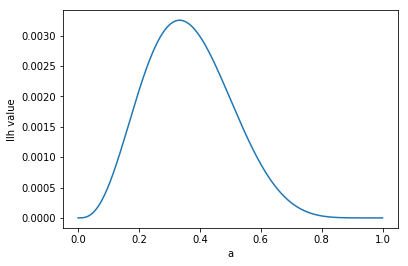

In [65]:
#Calculate the likelihood for this data

def llh(obsdata, a):
    prods = []
    for xi in obsdata:
        p_xi = (a**xi)*(1-a)**(1-xi)
        prods.append(p_xi)
    return np.prod(prods)

### This version of the llh() function gives the same result
### but is more efficient because it avoids the for loop
# def llh(obsdata,a):
#     obsdata = np.array(obsdata)
#     return np.prod(a**obsdata * (1-a)**(1-obsdata))

#we're eventually going to want to maximize this with respect to a
#so let's see what this looks like as a function of a

avals = np.linspace(0,1,1000)
llhs = [llh(obsdata, a) for a in avals]

plt.plot(avals, llhs)
plt.xlabel('a')
plt.ylabel('llh value')
plt.show()


Oftentimes you might hear people talk about the "log likelihood". This is simply the log of the likelihood function: $log(L(a))$. We usually prefer to work with the log likelihood because in order to extremize our likelihood in terms of the parameter $a$, we're going to need to take the derivative of the likelihood. The log likelihood turns all the products in the likelihood into a sum, which is much easier to take the derivative of:

$log(L(a)) = log(\prod_i P(x_i;a)) = \sum_i log(P(x_i;a))$

Where here we have just used the property that $log(xy) = log(x)+log(y)$

Additionally, you oftentimes might see people use the "negative log likelihood". This is just:

negative log likelihood  = $-1 \times log(L(a))$

And instead of maximizing the log likelihood, we will minimize the negative log likelihood. This is purely convention. 

/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


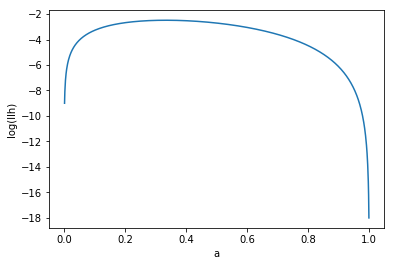

In [66]:
#Let's plot the log likelihood

log_llhs = np.log10(llhs)

plt.plot(avals, log_llhs)
plt.xlabel('a')
plt.ylabel('log(llh)')
plt.show()

The next step for obtaining our estimiator for $a$ is to extremize the log llh. This can be done numerically (pick your favorite minimizer/maximizer!), but in this case we can also do it analytically:

$log(L(a)) = \sum_i log(P(x_i;a)) = \sum_i log[a^{x_i}(1-a)^{(1-x_i)}]$

As per our calculus skills, if we want to extremize something we take the derivative and set it equal to zero:

$\frac{\partial}{\partial a} log(L(a)) = \sum_i \frac{(x-a)}{a-a^2}$

$\sum_i \frac{(x-a)}{a-a^2}$ = 0

$\sum_i (x_i-a) = 0$

$\sum_i (x_i) - Na = 0$

$\hat{a} = \frac{\sum_i (x_i)} {N}$

Where here $\hat{a}$ is used to denote that this is an estimator for the true value of $a$. Let's check to make sure this makes sense:

('Estimator for fraction of people who wear glasses:', 0.3333333333333333)


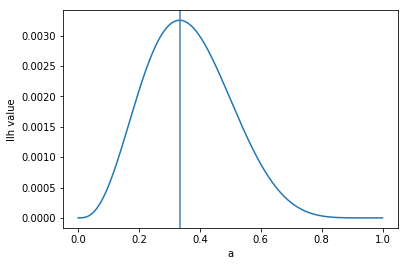

In [67]:
def a_estimator(obsdata):
    ahat = float(sum(obsdata))/len(obsdata)
    return ahat

ahat = a_estimator(obsdata)
print("Estimator for fraction of people who wear glasses:", ahat)

#plot our llh function and the estimator value of a for our observed data
plt.plot(avals, llhs)
plt.axvline(ahat, color='steelblue')
plt.xlabel('a')
plt.ylabel('llh value')
plt.show()

Looks like our estimator is in the right place! Or at the very least, it's properly identifying where the maximum of the likelihood is. 

So we now have a process for constructing an estimator for $a$, the proportion of people in the world who wear glasses, based off a single sample of data. Let's test this for a case where the true value of $a$ is $0.8$ (so 80% of people wear glasses)

('Estimator for fraction of people who wear glasses:', 0.82)
('True value for fraction of people who wear glasses:', 0.8)


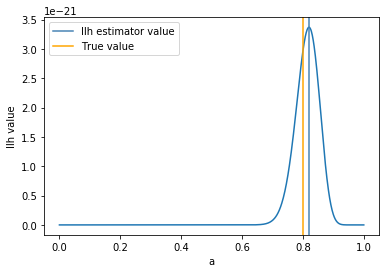

In [70]:
def parentpop(truea,size):
    #truea is the true value for a that we can set for the parent population
    poparr = []
    for i in range(0,size):
        rand = np.random.uniform(0,1)
        if rand < truea:
            poparr.append(1)
        else:
            poparr.append(0)
    return poparr

### Numpy version which is more efficient
# def parentpop(truea,size):
#     prob=[1-truea,truea]
#     xi = [0,1]
#     poparr = np.random.choice(xi,size=size,p=prob)
#     return poparr

def draw_subpop(truepop, N):
    #draw N observations from the true population
    whichvals = np.random.choice(truepop, N, replace=False)
    return whichvals

#create a parent population with a true value of a = 0.8 and size = 10000
atrue = 0.8
parentarr = parentpop(atrue,10000)

#draw a test sample of 100 people from our parent population
testpop = draw_subpop(parentarr, 100)

#calculate our llh estimator value
ahat = a_estimator(testpop)
print("Estimator for fraction of people who wear glasses:", ahat)
print("True value for fraction of people who wear glasses:", atrue)

#calculate our llh for this test sample and plot our estimator
avals = np.linspace(0,1,1000)
llhs = [llh(testpop, a) for a in avals]
plt.plot(avals, llhs)
plt.axvline(ahat, color='steelblue', label='llh estimator value')
plt.axvline(atrue, color='orange', label='True value')
plt.xlabel('a')
plt.ylabel('llh value')
# plt.yscale('log')
plt.legend(loc=2)
plt.show()
    

The llh estimator can take on a number of different forms, depending on what our $P(x_i;a)$ actually look like. You'll see an example used for point source searches later this week. Likelihood maximization is most appropriate when you have a guess to what the _form_ of the underlying distribution is, and are looking to estimate the specific distribution parameters associated with that form.

As a matter of fact, we might even have a distribution with *many* parameters! In this case, our individual observation probabilities would be functions of multiple parameters: $P(x_i;a,b,c...)$, and we would have to do a multi-dimensional maximization of the likelihood with respect to all the parameters $a, b, c...$. As an example of this, let's consider the problem of estimating the distribution of heights of a population based off a sample. Suppose we think that the true population of heights follows a gaussian distribution:

$P(H|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{{-(H-\mu)}^2}{2 \sigma^2}}$

where here $H$ refers to a height, and $P(H|\mu, \sigma)$ refers to the probability of a person having height $H$. We then have some sample data, consisting of the heights of each person in our sample:

In [71]:
sampleheights = [170., 165., 172., 175., 168., 167.]

And our likelihood will simply be the product of the probabilities for each of our observations:

$L(H_1, H_2, H_3..., \mu, \sigma) = P(H_1|\mu, \sigma) \times P(H_2|\mu, \sigma) \times P(H_3|\mu, \sigma)...$

$L(H_1, H_2, H_3..., \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{{-(H_1-\mu)}^2}{2 \sigma^2}} \times \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{{-(H_2-\mu)}^2}{2 \sigma^2}} \times \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{{-(H_3-\mu)}^2}{2 \sigma^2}}...$

In [88]:
#return the negative log likelihood for a set of sample heights given by Hs
def log_llh(params,Hs):
    mu = params[0]
    sigma = params[1]
    ps = []
    for h in Hs:
        p = np.log(1./np.sqrt(2*np.pi*sigma**2.))+(-(h-mu)**2./(2.*sigma**2))
        ps.append(p)
    return -1.*np.sum(ps)

#### vectorized version
# def log_llh(params,Hs):
#     mu = params[0]; sigma = params[1]
#     ps = np.log(1./np.sqrt(2*np.pi*sigma**2.))+(-(np.array(Hs)-mu)**2./(2.*sigma**2))
#     return -1*np.sum(ps)
    

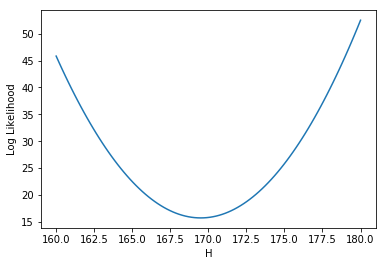

In [89]:
#Let's plot some slices of our likelihood space to make sure everything is working okay
#First let's fix sigma to some random value and look at how our llh varies with mu
fixedsigma = []
for havg in np.linspace(160,180,100):
    fixedsigma.append(log_llh([havg, 3.], sampleheights))

#plot our results
plt.plot(np.linspace(160,180,100), fixedsigma)
plt.xlabel("H")
plt.ylabel("Log Likelihood")
    
plt.show()

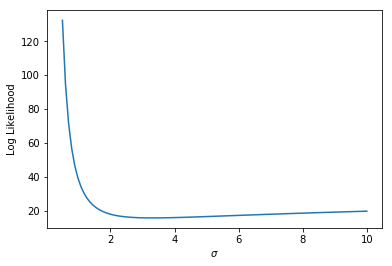

In [91]:
#now let's fix mu and vary sigma
fixedmu = []
for sigtest in np.linspace(0.5, 10., 100):
    fixedmu.append(log_llh([169.5, sigtest], sampleheights))


plt.plot(np.linspace(0.5, 10, 100), fixedmu)
plt.xlabel('$\sigma$')
plt.ylabel('Log Likelihood')
plt.show()

In [92]:
#Now let's go through and do the full 2d minimization 
#scipy has some build in minimization functions that are really useful for doing these types of things
#all we have to do is give scipy our function to minimize and an initial guess
#see documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
from scipy import optimize

result = optimize.minimize(log_llh, [169., 2.0], args=sampleheights)
print(result)

      fun: 15.684503219472408
 hess_inv: array([[1.74151787, 0.04242564],
       [0.04242564, 0.88728792]])
      jac: array([-1.66893005e-06,  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([169.49999668,   3.30403979])


## Confidence Intervals
Suppose we want to know the value of a parameter $X$ and have estimated it from the data, giving result $x$. We know the resolution of our measurements, and thus the variance, $V(x)$ and the standard deviation $\sigma$. Our goal is then to create a *confidence interval*: An interval within which there is a $C$ % chance that a single observation will lie within the interval, where $C$ is our *confidence level*. Formally, the confidence interval ($x_-, x_+$) for a given confidence level $C$ obeys the requirement that:

$Prob(x_- \leq x \leq x_+) = \int_{x_-}^{x_+}P(x)dx = C$

There are a few possible ways to construct this interval:

1. The *symmetric interval*: $x_-$ and $x_+$ are equidistant from the mean, $\mu$, i.e $x_+ - \mu = \mu - x_-$

2. The *central interval*: The probability above and below the interval are equal: $\int_{-\infty}^{x_-} P(x)dx = \int_{x^+}^{\infty} P(x)dx = (1-C)/2$

Let's practice with a simple example. Suppose we measure the mass of an oreo to be 18 grams, with a standard deviation of 4 grams. Assuming that the distribution of oreo masses is a gaussian, what is the 90% confidence interval for the mass of a single oreo?

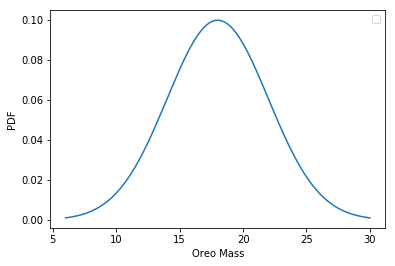

In [95]:
from scipy import stats
# plot our distribution corresponding to our observation
mu = 18
sigma = 4
x = np.linspace(mu-3*sigma, mu+3*sigma, 1000)

plt.xlabel('Oreo Mass')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

For a 90% central confidence interval, we know that:

$\int_{-\infty}^{x_-}  \frac{1}{\sqrt{2 \pi \sigma^2}} e ^{\frac{{x-\mu}^2}{2 \sigma^2}}dx = \int_{x^+}^{\infty}  \frac{1}{\sqrt{2 \pi \sigma^2}} e ^{\frac{{x-\mu}^2}{2 \sigma^2}}dx = (1-.9)/2$

In [96]:
#stats.norm.ppf is the inverse of the stats.norm.cdf,
#returning an x value at which integral(-inf, x) (normal dist)=input, in units of "sigma"
#From the above, we want stats.norm.cdf(x-) = 0.05, so:
howmanysigma = stats.norm.ppf(.05)

#convert this to an oreo mass:
oreomass = mu+howmanysigma*sigma
print("lower bound on central confidence interval:", oreomass)

#Now let's do the same thing but to calculate the upper bound on the central condifdence interval
howmanysigma2 = stats.norm.ppf(.95)

#convert to an oreo mass:
oreomass2 = mu+howmanysigma2*sigma
print("upper bound on central confidence interval:", oreomass2)

-1.6448536269514729
('lower bound on central confidence interval:', 11.420585492194109)
('upper bound on central confidence interval:', 24.57941450780589)


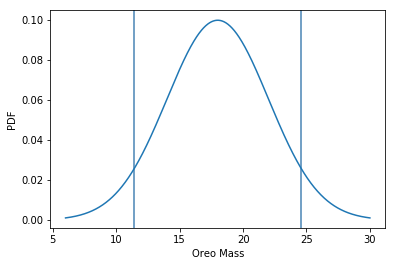

In [98]:
#plot our confidence interval
mu = 18
sigma = 4
x = np.linspace(mu-3*sigma, mu+3*sigma, 1000)

plt.xlabel('Oreo Mass')
plt.ylabel('PDF')
plt.axvline(oreomass, color='steelblue')
plt.axvline(oreomass2, color='steelblue')
plt.plot(x, stats.norm.pdf(x, mu, sigma))

The interpretation here is that for a single oreo, if we say that it's mass is between 11.4 and 24.5, we will be correct 90% of the time. 

Notice that in this case, because we assumed a gaussian distribution, our central interval is also a symmetric interval. This isn't always true, since our underlying PDF may be asymmetric.  

We didn't necessarily have to choose a 90% confidence interval. The level of your confidence interval is up to you! Common values are 68% (1 $\sigma$), 90% (1.64 $\sigma$), and 99% (2.58 $\sigma$). There is a trade off between a narrow interval and low confidence. You can say with great confidence that the mass will lie within very wide limits, but if you want to tie it down more precisely the confidence lessens. 

('lower bound on 99% central confidence interval:', 7.696682785804397)
('upper bound on 99% central confidence interval:', 28.3033172141956)


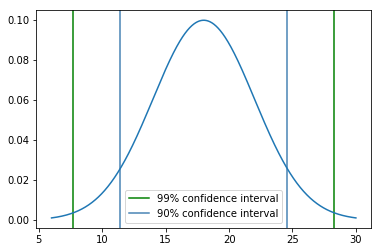

In [100]:
#Let's calculate a 99% confidence interval
howmanysigma = stats.norm.ppf(.005)

#convert this to an oreo mass:
oreo99lower = mu+howmanysigma*sigma
print("lower bound on 99% central confidence interval:", oreo99lower)

#Now let's do the same thing but to calculate the upper bound on the central condifdence interval
howmanysigma2 = stats.norm.ppf(.995)

#convert to an oreo mass:
oreo99upper = mu+howmanysigma2*sigma
print("upper bound on 99% central confidence interval:", oreo99upper)

plt.axvline(oreo99lower, color='green', label='99% confidence interval')
plt.axvline(oreo99upper, color='green')
plt.axvline(oreomass, color='steelblue', label='90% confidence interval')
plt.axvline(oreomass2, color='steelblue')
plt.legend()
plt.plot(x, stats.norm.pdf(x, mu, sigma))

Other forms of confidence intervals that are useful to talk about are one-tailed limits. These are useful if we want to make statements like "the mass of an oreo is at least $x$ grams" or "the mass of an oreo is less than $x$ grams". These one-tailed limits satisfy the condition:

$Prob(x < x_+) = \int_{-\infty}^{x_+}P(x)dx$ (for an upper limit $x_+$)

$Prob(x > x_-) = \int_{x_-}^{\infty}P(x)dx$ (for a lower limit $x_-$)

('90% lower limit on oreo mass:', 12.873793737821599)


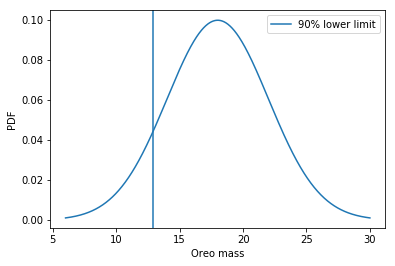

In [101]:

#for computing a 90% lower limit, we want to find the mass where 90% of the distribution is above this mass
howmanysig = stats.norm.ppf(.1)
lowerlim =mu+howmanysig*sigma

#we can say, with 90% confidence, that the mass of an oreo is greater than this value
print("90% lower limit on oreo mass:", lowerlim)
plt.axvline(lowerlim, label='90% lower limit')

plt.xlabel('Oreo mass')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

Notice that the 90% lower limit and the lower bound on the 90% central limit are NOT the same. This is because the 90% lower limit requires that all 10% of the "non-included" area be on one side of the distribution. 

Let's test our interpretation of our lower limit. If we're correct, then if we look at an individual oreo, then 90% of the time it will have a mass greater than 12.87. 

In [106]:
#simulate a package of oreos
def oreo_package(N_oreos):
    return np.random.normal(loc=mu, scale=sigma, size=N_oreos)

#simulate opening 1000 packages, and picking an oreo to test from each package
lightoreos = 0
Ntrials = 1000
for k in range(0,Ntrials):
    onepackage = oreo_package(28) 
    #a megastuff oreo package has 28 oreos
    one_oreo = np.random.choice(onepackage)
    if one_oreo < 12.87:
        lightoreos+=1

print("number of oreos lighter than our lower limit:", lightoreos)
print("fraction:", lightoreos/float(Ntrials))

('number of oreos lighter than our lower limit:', 95)
('fraction:', 0.095)
